<a href="https://colab.research.google.com/github/Sahithi419/AI-PROJECT1/blob/main/mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
from google.colab import files

# Choose the file from your local machine
uploaded = files.upload()
import os

# Make a directory named kaggle and move the API key file into it
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
import zipfile

# Replace 'zip_file_name.zip' with the name of the downloaded file
with zipfile.ZipFile('challenges-in-representation-learning-facial-expression-recognition-challenge.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

import tarfile

file_name = '/content/dataset/fer2013.tar.gz'  # Update with your file path

path_to_extract = '/content/dataext'  # Update with your desired extraction directory

with tarfile.open(file_name, 'r:gz') as tar:
    tar.extractall(path=path_to_extract)

!ls '/content/extracted/'
df = pd.read_csv('/content/dataext/fer2013/fer2013.csv')
df.head()
df.info()
#Assigning Names to Emotions in labels

num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
df.Usage.value_counts()
k = np.array(list(map(int,df.iloc[0,1].split(" "))),dtype='uint8').reshape((48,48))
k.shape
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
X_train[0]
plt.imshow(np.array(X_train[0], dtype = 'uint8').reshape(48,48,1), cmap = 'gray')
X_train = np.array(X_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
X_test = np.array(X_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train.shape
import keras
from keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
### some image augumentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator(
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.axis('off')
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    break
#### Creating model for training
from keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

### for testing  give continuaton of code by adding above one

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer to transition from convolution to dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_flow,
    steps_per_epoch=len(X_train) / batch_size,
    epochs=100,
    validation_data=test_flow,
    validation_steps=len(X_test) / batch_size
)


In [ ]:
model.save('emotion_detection_model.h5')

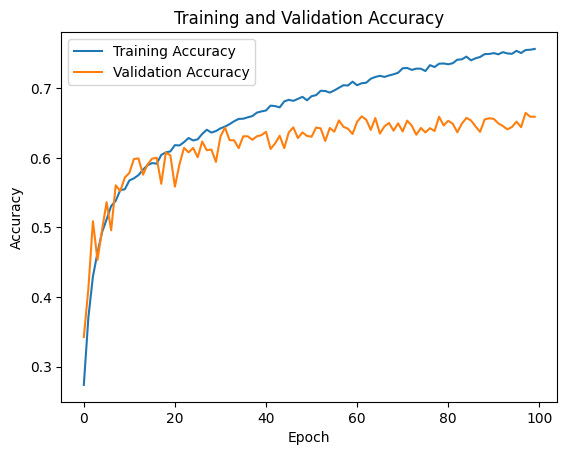

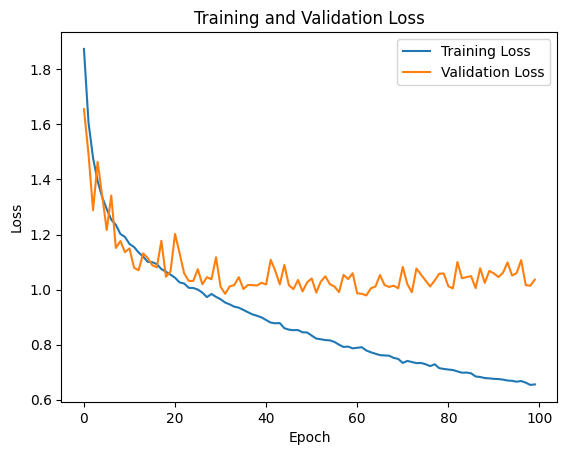

In [ ]:
 #Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
!pip install opencv-python-headless


In [154]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take a photo
filename = take_photo()
print('Saved to {}'.format(filename))


<IPython.core.display.Javascript object>

Saved to photo.jpg


In [158]:
# Load the pre-trained model
from keras.models import load_model

# Load your trained model (change the path if needed)
model_path = '/content/emotion_detection_model.h5'
loaded_model = load_model(model_path)

# Define emotion labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Function to predict emotion from the image
def predict_emotion(image_path):
    from keras.preprocessing import image
    import numpy as np

    # Load and preprocess the image
    img = image.load_img(image_path, grayscale=True, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the emotion
    prediction = loaded_model.predict(img_array)

    # Get the predicted emotion label
    predicted_label = emotion_labels[np.argmax(prediction)]

    return predicted_label

# Example usage: Replace 'photo.jpg' with the path to your captured photo
image_path = '/content/photo.jpg'
predicted_emotion = predict_emotion(image_path)
print("Predicted Emotion:", predicted_emotion)


1/1 [==============================] - 0s 142ms/step
Predicted Emotion: Sad


In [159]:

 # Trigger an alarm using Librosa or any other alert mechanism
import librosa
from playsound import playsound  # A library for playing audio

from IPython.display import Audio


# Predicted Emotion from Captured Image
predicted_emotion = predict_emotion(image_path)

# Check if the predicted emotion is 'Sad' or 'Fear'
if predicted_emotion in ['Sad', 'Fear']:
    alarm_sound_path = '/content/mixkit-alert-alarm-1005.wav'

    try:
        # Attempt to play the audio
        audio = Audio(filename=alarm_sound_path, autoplay=True)
        display(audio)  # Display the audio player
    except Exception as e:
        print(f"Error: {e}")




1/1 [==============================] - 0s 18ms/step
